In [3]:
# Red wine quality dataset focuses on biochemical composition of red wine.
# It contains 12 columns - 11 with input variables and one output variable - quality.
# there are 1599 rows in the dataset what will be shawn later 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [5]:
# Load dataset from csv and print first 5 rows to look whats inside
df = pd.read_csv('./wine-quality/winequality-red.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# basic data visualisation and checking for need of preprocessing
# df.isnull() checks for any missing data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# check for maximum and minimum values in output column to label them
df['quality'].max()

8

In [8]:
df['quality'].min()

3

In [9]:
# to make it easier to interpret the output, split the quality of wine
# into two categories and label them to be more human readable
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [10]:
# count occurances of both categories
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [11]:
# replacing text labels with numbers for purpose of traing a model.
# Later they will be decode again to human readable form
labelencoder_y = LabelEncoder()
df['quality'] = labelencoder_y.fit_transform(df['quality'])

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [13]:
# get shape of the dataset. It has 1599 rows and 12 columns
df.shape

(1599, 12)

<AxesSubplot:>

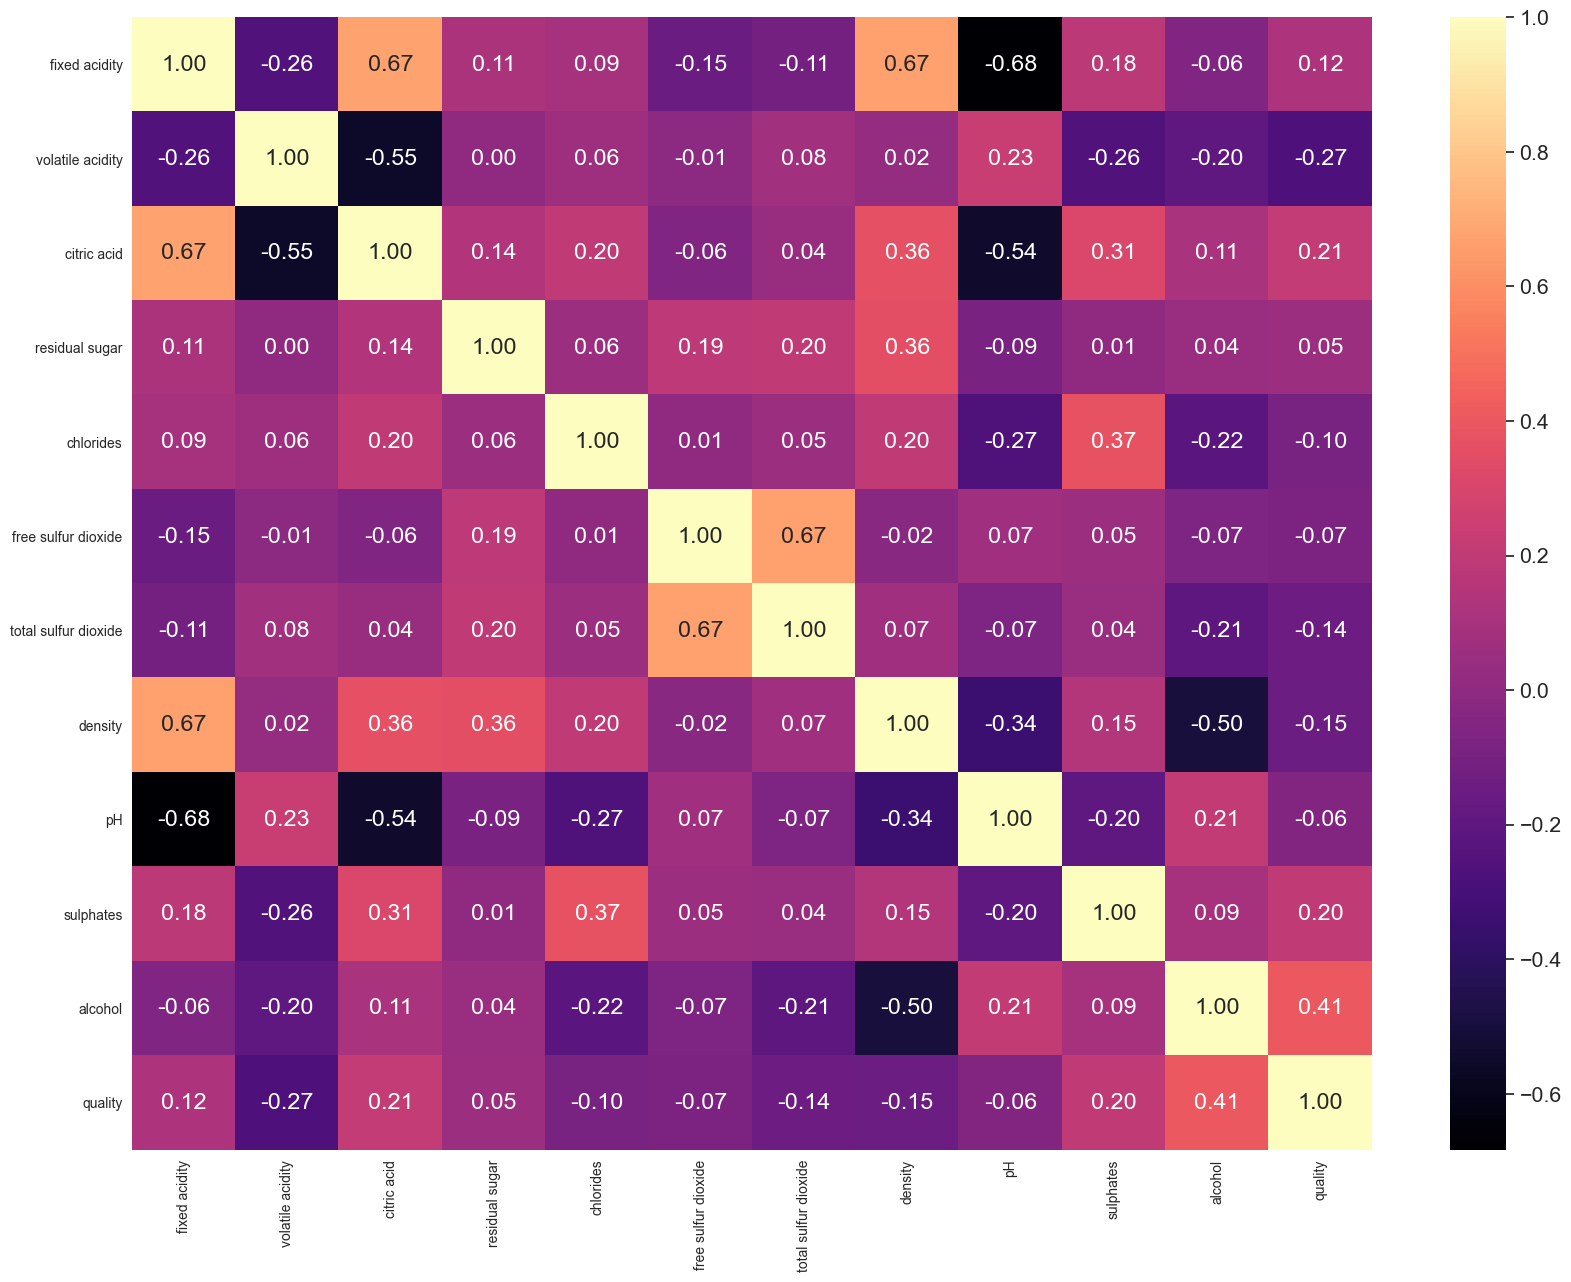

In [14]:
# To better understand what the dataset contains, data is presented on a heatmap or confusing matrix
# It show correlenation between each and every variable and helps us visualize 
# structure and connections between data. Correlation can be positive or negative.
# Positive correlation means that the higher value of one variable, the higher is the second vairable.
# negative correlatoin means that the lower is one variable the higher is the second one.
# the closer the correlation factor is to 1 or -1 the stronger the correlation between variables is.
# Correlation factor around 0 means there are nearly no correlation beween variables.

correlation = df.corr()
fig, ax = plt.subplots(figsize = (20, 15), dpi=100)
plt.grid(False)
sns.set(font_scale=1.4)
sns.heatmap(correlation, cmap='magma', annot=True, fmt='.2f')

In [15]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [16]:
# create two arrays - X - two-dimensional with inputs and y - one dimensional with outputs 
X = df.drop('quality', axis = 1).values
y = df['quality'].values.reshape(-1,1)

In [17]:
# split the given arrays in proportion 20/80 test/train size.
# set random state to achieve repetitive results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test:  (320, 1)


In [19]:
# standardize data using standard scaler to make it more unified 
# and easier for the classifier to interpret it properly
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Accuracy on training set: 1.0
Accuracy on test set: 0.865625


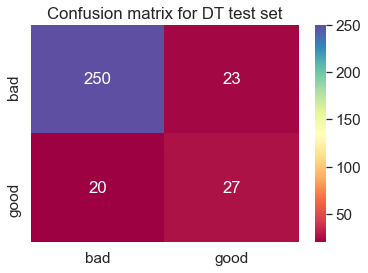

In [20]:
# Decision tree classifier
dt_classifier = tree.DecisionTreeClassifier(random_state=199)
dt_classifier.fit(X_train, y_train)
y_train_predictions = dt_classifier.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_train_predictions)
print("Accuracy on training set: " + str(accuracy_dt_train))

y_dt_test_predictions = dt_classifier.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_dt_test_predictions)
print("Accuracy on test set: " + str(accuracy_dt_test))

cf_dt = confusion_matrix(y_test, y_dt_test_predictions)
plt.title("Confusion matrix for DT test set")
sns.heatmap(cf_dt, annot=True, fmt = "d", cmap='Spectral', yticklabels=labels, xticklabels=labels)

tp_dt = confusion_matrix(y_test, y_dt_test_predictions)[0,0]
fp_dt = confusion_matrix(y_test, y_dt_test_predictions)[0,1]
tn_dt = confusion_matrix(y_test, y_dt_test_predictions)[1,1]
fn_dt = confusion_matrix(y_test, y_dt_test_predictions)[1,0]

Accuracy for K-NN train set: 1.0
Accuracy for K-NN test set: 0.884375


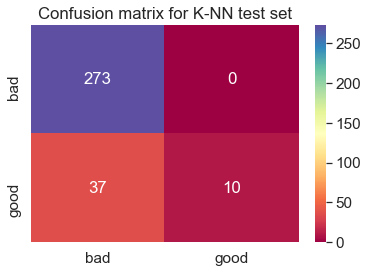

In [28]:
# K-NN 
knn_classifier = KNeighborsClassifier(leaf_size = 1, n_neighbors = 128, weights = 'distance')
knn_classifier.fit(X_train, y_train.ravel())

y_knn_train_predictions = knn_classifier.predict(X_train)
accuracy_knn_train = accuracy_score(y_train.ravel(), y_knn_train_predictions)
print("Accuracy for K-NN train set: " + str(accuracy_knn_train))

y_knn_test_predictions = knn_classifier.predict(X_test)
accuracy_knn_test = accuracy_score(y_test.ravel(), y_knn_test_predictions)
print("Accuracy for K-NN test set: " + str(accuracy_knn_test))

cf_knn = confusion_matrix(y_test, y_knn_test_predictions)
plt.title("Confusion matrix for K-NN test set")
sns.heatmap(cf_knn, annot=True, fmt="d", cmap='Spectral', yticklabels=labels, xticklabels=labels)

tp_knn = confusion_matrix(y_test, y_knn_test_predictions)[0,0]
fp_knn = confusion_matrix(y_test, y_knn_test_predictions)[0,1]
tn_knn = confusion_matrix(y_test, y_knn_test_predictions)[1,1]
fn_knn = confusion_matrix(y_test, y_knn_test_predictions)[1,0]

Accuracy for GaussianNB on train set: 0.8412822517591869
Accuracy for GaussianNB on test set: 0.853125


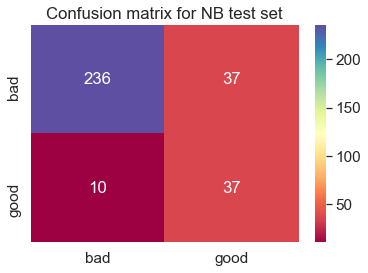

In [29]:
# Naive Bayes
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train.ravel())

y_NB_train_predictions = NB_classifier.predict(X_train)
accuracy_NB_train = accuracy_score(y_train, y_NB_train_predictions)
print("Accuracy for GaussianNB on train set: " + str(accuracy_NB_train))

y_NB_test_predictions = NB_classifier.predict(X_test)
accuracy_NB_test = accuracy_score(y_test, y_NB_test_predictions)
print("Accuracy for GaussianNB on test set: " + str(accuracy_NB_test))

cf = confusion_matrix(y_test, y_NB_test_predictions)
plt.title("Confusion matrix for NB test set")
sns.heatmap(cf, annot=True, fmt="d", cmap='Spectral', yticklabels=labels, xticklabels=labels)

tp_nb = confusion_matrix(y_test, y_NB_test_predictions)[0,0]
fp_nb = confusion_matrix(y_test, y_NB_test_predictions)[0,1]
tn_nb = confusion_matrix(y_test, y_NB_test_predictions)[1,1]
fn_nb = confusion_matrix(y_test, y_NB_test_predictions)[1,0]

In [30]:
models = [
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test),
          ('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_NB_train, accuracy_NB_test)
         ]

In [31]:
clf_comp = pd.DataFrame(data = models, columns = ['Model', 'True Positive', 'False Positive', 'True Negative',
                                                 'False Negative', 'Accuracy(training)', 'Accuracy(test)'])

In [32]:
clf_comp

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test)
0,Decision Tree Classification,250,23,27,20,1.000000,0.865625
1,K-Nearest Neighbors (KNN),273,0,10,37,1.000000,0.884375
2,Naive Bayes,236,37,37,10,0.841282,0.853125


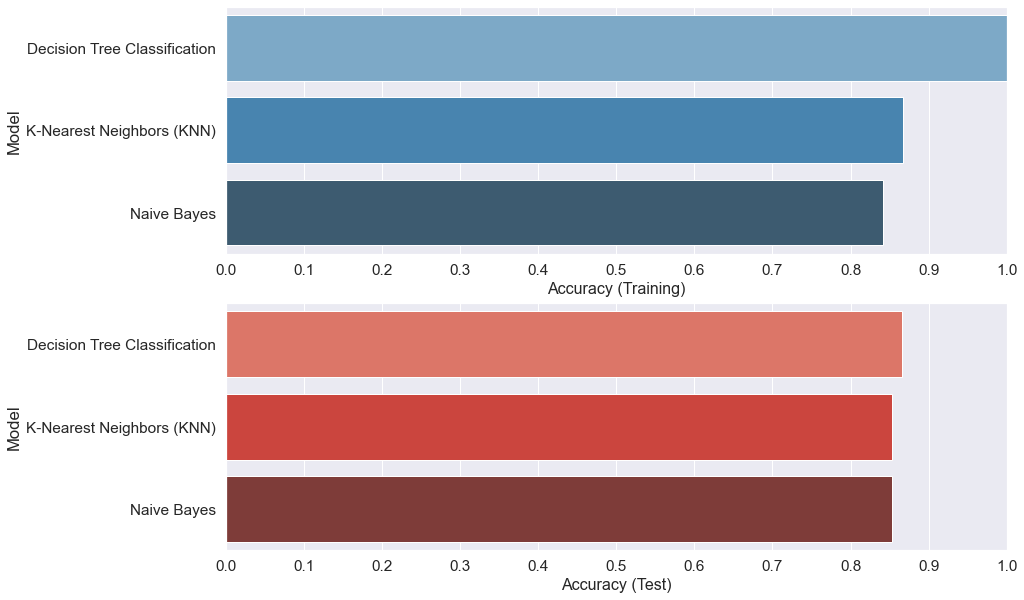

In [26]:
f, axes = plt.subplots(2,1, figsize=(14,10))

clf_comp.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = clf_comp, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

clf_comp.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = clf_comp, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()